<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week3/PMA_Q2_%E6%B7%BB%E5%8A%A0%E5%8F%AF%E8%A7%86%E5%8C%96%E4%BA%A4%E4%BA%92%E6%95%88%E5%BA%94%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Used for test.xlsx to Used for test (1).xlsx


In [41]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.read_excel('Used for test.xlsx', header=None) # 对于没有表头的数据
# 为每一列添加标题
data.columns = ['fill', 'carbonation', 'line_speed']
column1_data = data['fill']
column2_data = data['carbonation']
column3_data = data['line_speed']
print(data)

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

    fill  carbonation  line_speed
0    0.4         0.10         210
1    2.0         0.10         210
2    3.0         0.10         210
3    1.7         0.10         210
4    1.8         0.10         210
5    1.5         0.12         210
6    2.0         0.12         210
7    2.8         0.12         210
8    2.1         0.12         210
9    2.0         0.12         210
10   0.5         0.10         240
11   2.0         0.10         240
12   0.9         0.10         240
13   1.9         0.10         240
14   6.0         0.10         240
15   3.4         0.12         240
16   2.1         0.12         240
17   0.6         0.12         240
18   4.5         0.12         240
19   1.6         0.12         240
20   4.7         0.10         270
21   3.4         0.10         270
22   1.2         0.10         270
23   3.1         0.10         270
24   4.3         0.10         270
25   4.4         0.12         270
26   4.2         0.12         270
27   3.2         0.12         270
28   3.7      

In [24]:
def anova_interaction():

    # Determine the ANOVA with interaction
    formula = 'fill ~ C(carbonation) + C(line_speed) + C(carbonation):C(line_speed)'
    lm = ols(formula, data).fit()
    anovaResults = anova_lm(lm)
    # Calculate R-square
    rsquared = lm.rsquared
    # --- >>> STOP stats <<< ---
    print(anovaResults)
    print("R-square:", rsquared)

    return anovaResults['F'].iloc[0]

if __name__ == '__main__':
    anova_interaction()

                                df    sum_sq   mean_sq         F    PR(>F)
C(carbonation)                 1.0   0.81225  0.812250  0.549653  0.463866
C(line_speed)                  3.0  21.87475  7.291583  4.934247  0.006281
C(carbonation):C(line_speed)   3.0   0.03875  0.012917  0.008741  0.998854
Residual                      32.0  47.28800  1.477750       NaN       NaN
R-square: 0.3245898127153596


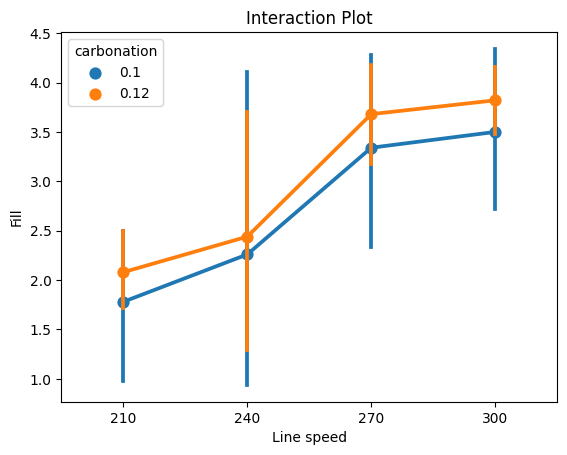

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建交互作用可视化图形
sns.pointplot(x='line_speed', y='fill', hue='carbonation', data=data)
# 设置图形标题和轴标签
plt.title('Interaction Plot')
plt.xlabel('Line speed')
plt.ylabel('Fill')

# 显示图形
plt.show()

In [43]:
df = data
print(df)
df1 = pd.DataFrame()
data_list = []
for i in df.carbonation.unique():
    for j in df.line_speed.unique():
        data = df[(df.carbonation == i)&(df.line_speed == j)]['fill'].values
        data_list.append(data)
        df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
df1 = df1.T
print(df1)

    fill  carbonation  line_speed
0    0.4         0.10         210
1    2.0         0.10         210
2    3.0         0.10         210
3    1.7         0.10         210
4    1.8         0.10         210
5    1.5         0.12         210
6    2.0         0.12         210
7    2.8         0.12         210
8    2.1         0.12         210
9    2.0         0.12         210
10   0.5         0.10         240
11   2.0         0.10         240
12   0.9         0.10         240
13   1.9         0.10         240
14   6.0         0.10         240
15   3.4         0.12         240
16   2.1         0.12         240
17   0.6         0.12         240
18   4.5         0.12         240
19   1.6         0.12         240
20   4.7         0.10         270
21   3.4         0.10         270
22   1.2         0.10         270
23   3.1         0.10         270
24   4.3         0.10         270
25   4.4         0.12         270
26   4.2         0.12         270
27   3.2         0.12         270
28   3.7      

<ipython-input-43-14e6b5a93861>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
<ipython-input-43-14e6b5a93861>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
<ipython-input-43-14e6b5a93861>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex.from_arrays([[i],[j]])).T)
<ipython-input-43-14e6b5a93861>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(pd.DataFrame(data, columns = pd.MultiIndex

0.10  210    5
      240    5
      270    5
      300    5
0.12  210    5
      240    5
      270    5
      300    5
dtype: int64


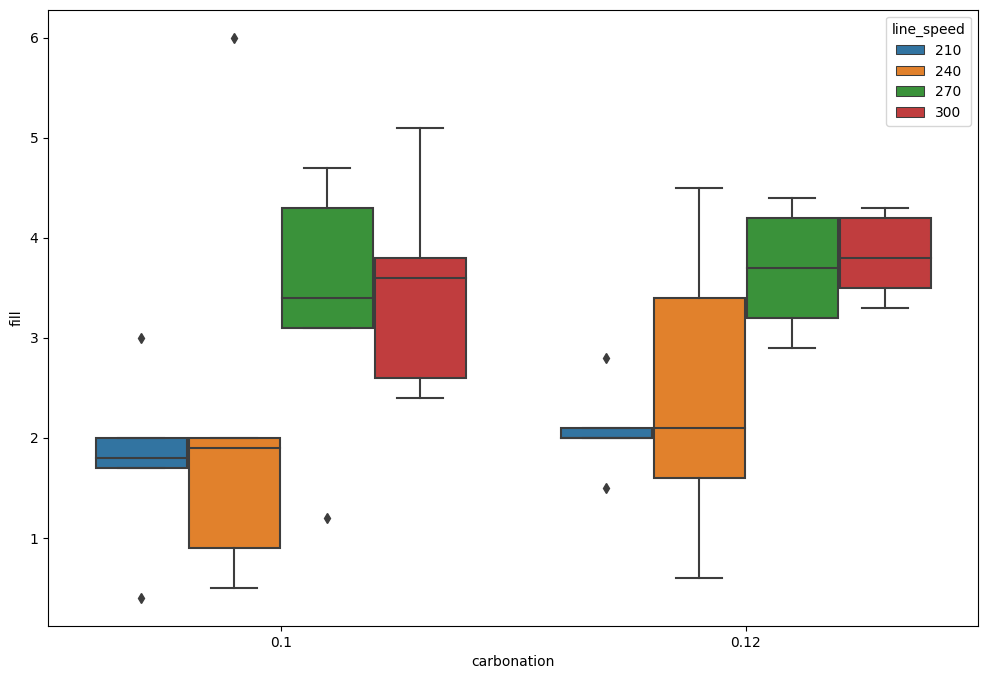

In [44]:
# 查看各组数量分布
print(df1.count())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
sns.boxplot(x = 'carbonation', y = 'fill', data = df, hue = 'line_speed')  # 传入的为DataFrame ,x, y,hue,可指定其索引
plt.show()

In [45]:
from scipy import stats
# Shapiro-Wilk 检验(小数据量的正态分布检验)  ：正态检验(方差分析前提1)
sw_test_res = pd.DataFrame()
for i in df1.columns:
    statistic, pvalue = stats.shapiro(df1[i].dropna())
    sw_test_res[i]  = [statistic, pvalue]
sw_test_res.index = ['statistic', 'p_value']
print(sw_test_res.T.round(3))


# levene test :方差齐性检验
print('基于中位数的levene test P值：', stats.levene(*data_list, center='median').pvalue)

             statistic  p_value
(0.1, 210)       0.940    0.667
(0.1, 240)       0.804    0.087
(0.1, 270)       0.923    0.551
(0.1, 300)       0.928    0.584
(0.12, 210)      0.909    0.460
(0.12, 240)      0.977    0.920
(0.12, 270)      0.942    0.679
(0.12, 300)      0.929    0.589
基于中位数的levene test P值： 0.4304812449296419


In [46]:
# 判断交互作用
# df1.mean() # 为Series
df_mean = df1.mean().unstack().round(1)  # unstack :分层索引重置方法将series换为DataFrame， 并保留数据小数点一位
df_mean.columns = ['210', '240', '270','300']
df_mean = df_mean[['300', '210', '240','270']]
print(df_mean)

      300  210  240  270
0.10  3.5  1.8  2.3  3.3
0.12  3.8  2.1  2.4  3.7


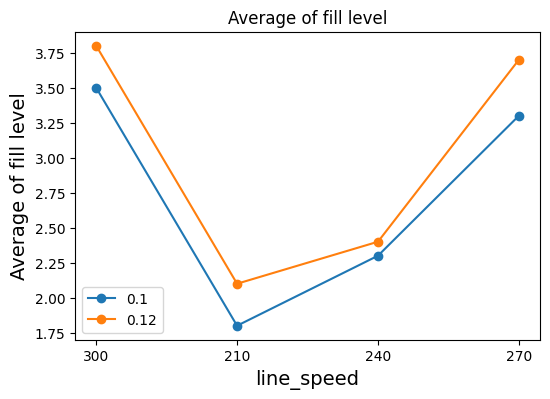

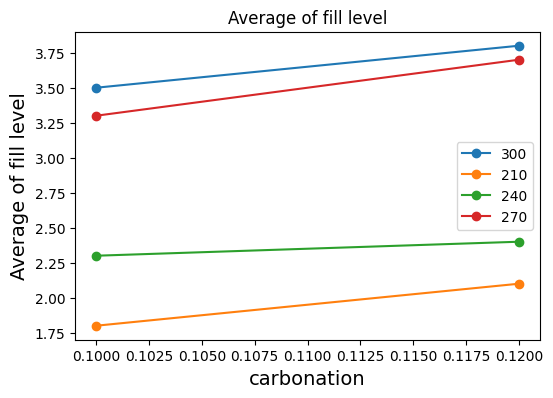

In [51]:
# 定义一个绘图函数
def draw_pics(data, feature):
    fig, ax = plt.subplots(figsize=(6, 4))
    for i in data.index:
        ax.plot(data.columns, data.loc[i, :], label = i, marker='o')
        ax.legend()
    ax.set_title("Average of fill level")
    ax.set_xlabel(feature, fontdict={'fontsize': 14})
    ax.set_ylabel("Average of fill level", fontdict={'fontsize': 14})
    plt.show()
# 绘制不同的性别在不同的教育程度下的均值变化
draw_pics(df_mean, 'line_speed')

# 结论：存在双因素交互作用

# 绘制不同的教育程度在不同的性别下的均值变化
draw_pics(df_mean.T, 'carbonation')

In [54]:
import statsmodels.api as sm
# 不同教育程度的事后多重比较
print(sm.stats.multicomp.pairwise_tukeyhsd(groups=df.line_speed, endog=df.fill).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   210    240     0.42 0.8483 -0.9728 1.8128  False
   210    270     1.58  0.021  0.1872 2.9728   True
   210    300     1.73   0.01  0.3372 3.1228   True
   240    270     1.16  0.131 -0.2328 2.5528  False
   240    300     1.31 0.0716 -0.0828 2.7028  False
   270    300     0.15 0.9914 -1.2428 1.5428  False
---------------------------------------------------


       linespeed
count  20.000000
mean    3.005000
std     1.125997
min     0.600000
25%     2.075000
50%     3.250000
75%     3.900000
max     4.500000
Box Plot Values:
Q1: 2.075, Q3: 3.9, IQR: 1.8249999999999997
Lower Bound for Outliers: -0.6624999999999996
Upper Bound for Outliers: 6.637499999999999

NO_of_class: 5.322021645595746
class Range: 0.78
Rounded NO. of class: 5


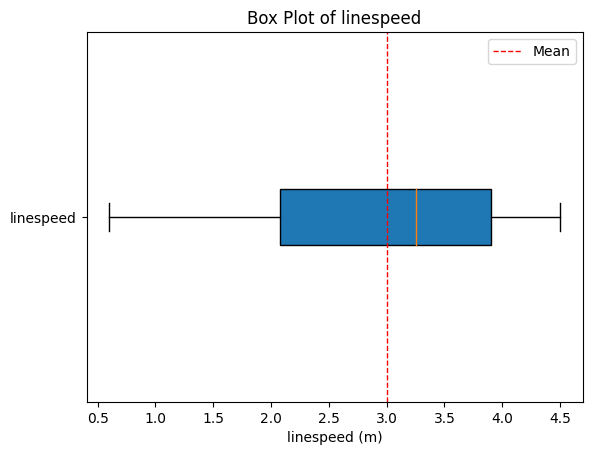

Classes:
   linespeed  Frequency
0       1.38          1
1       2.16          6
2       2.94          2
3       3.72          5
4       4.50          6 



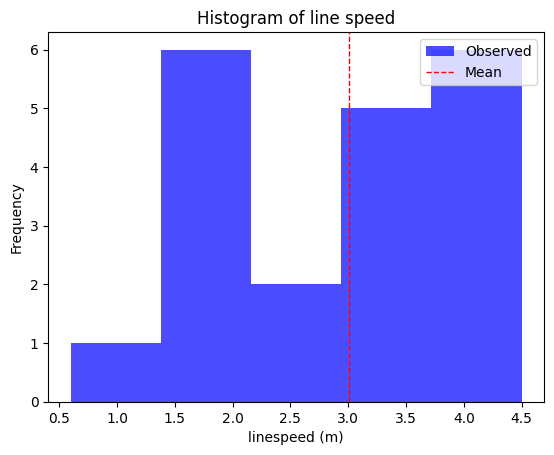

Chi-Square Table:
          χ^2
0    0.160997
1    2.881751
2    1.808239
3    0.008152
4    1.963835
Sum  6.822973
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 6.82297337073213, p-value: 0.049179777035176814


<ipython-input-16-17709b8a740b>:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.074487,0.074487,1.489737
1,0.226493,0.152006,3.040122
2,0.476983,0.250490,5.009804
3,0.737284,0.260300,5.206007
4,0.907863,0.170580,3.411599
5,Sum =,0.907863,20.000000


In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Sample interval data
linespeed_data = np.array([1.5,2.0,2.8,2.1,2,3.4,2.1,0.6,4.5,1.6,4.4,4.2,3.2,3.7,2.9,4.3,3.3,4.2,3.8,3.5])
linespeed_df = pd.DataFrame(linespeed_data, columns=['linespeed'])
desc_stats = linespeed_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = linespeed_df['linespeed'].quantile(0.25)
Q3 = linespeed_df['linespeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(linespeed_data)
std_dev = np.std(linespeed_data, ddof=1)

# Calculate Sturges' number of bins
n = len(linespeed_data)
k = int(1 + 3.322 * np.log10(n))
NO_of_class = 1 + 3.322 * np.log10(n)
classrange=np.ptp(linespeed_data)/k
print("NO_of_class:",NO_of_class)
print("class Range:",classrange)
print("Rounded NO. of class:",k)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(linespeed_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)

# Box plot
plt.boxplot(linespeed_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of linespeed')
plt.xlabel('linespeed (m)')
plt.yticks([1], ['linespeed'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'linespeed': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.linespeed=hist_df.linespeed+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(linespeed_data, bins = bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of line speed')
plt.xlabel('linespeed (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

In [ ]:
# Bartlett 方差齐性检验
import pandas as pd
from scipy.stats import bartlett

# 根据carbonation等于0.1的条件筛选数据
subset = data[data['carbonation'] == 0.1] #从data原始导入的Excel里根据某一列的分类变量进行数据提取

# 根据line_speed进行分组
gb = subset.groupby('line_speed')

# 将每个分组中的 Interval 数据提取出来作为输入数据
data_for_analysis = [group['fill'] for name, group in gb] #再根据内部第二变量的分组提取Y
print(data_for_analysis)
# 使用 Bartlett 方差齐性检验来检查数据
stat, p = bartlett(*data_for_analysis)

# 打印 Bartlett 方差齐性检验结果
print('Bartlett test statistic = {:.4f}, p-value = {:.4f}'.format(stat, p))

[0    0.4
1    2.0
2    3.0
3    1.7
4    1.8
Name: fill, dtype: float64, 10    0.5
11    2.0
12    0.9
13    1.9
14    6.0
Name: fill, dtype: float64, 20    4.7
21    3.4
22    1.2
23    3.1
24    4.3
Name: fill, dtype: float64, 30    3.6
31    2.6
32    2.4
33    3.8
34    5.1
Name: fill, dtype: float64]
Bartlett test statistic = 3.2712, p-value = 0.3517
